1. Предварительная обработка данных

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Загрузка данных
data = pd.read_csv('HousingData.csv')

# Первичный анализ
display(data.head())
print(data.info())
print(data.describe())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695   

In [3]:
# Заполнение пропущенных значений медианой
for column in data.columns:
    if data[column].isnull().any():
        if data[column].dtype in ['int64', 'float64']:
            data[column].fillna(data[column].median(), inplace=True)

C:\Users\Иван\AppData\Local\Temp\ipykernel_6612\3350695042.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\Иван\AppData\Local\Temp\ipykernel_6612\3350695042.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [5]:
# Выбор признаков и целевой переменной
features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'

X = data[features]
y = data[target]

# Разделение данных (80% - обучение, 20% - тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

2. Построение моделей

Дерево решений

In [6]:
# Создание и обучение модели дерева решений
dt_model = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_dt = dt_model.predict(X_test)

Случайный лес

In [7]:
# Создание и обучение модели случайного леса
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
rf_model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_rf = rf_model.predict(X_test)

3. Оценка качества моделей

Я буду использовать две метрики для оценки моделей регрессии:

- Среднеквадратичная ошибка (MSE) - показывает среднее значение квадратов ошибок. Чем меньше значение, тем лучше.

- Коэффициент детерминации (R²) - показывает, насколько хорошо модель объясняет вариацию данных. Значение от 0 до 1, где 1 - идеальное соответствие.


In [8]:
# Функция для вычисления метрик
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R²: {r2:.2f}")
    return mse, r2

# Оценка моделей
mse_dt, r2_dt = evaluate_model(y_test, y_pred_dt, "Decision Tree")
mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")

Decision Tree:
  MSE: 9.62
  R²: 0.87
Random Forest:
  MSE: 9.09
  R²: 0.88


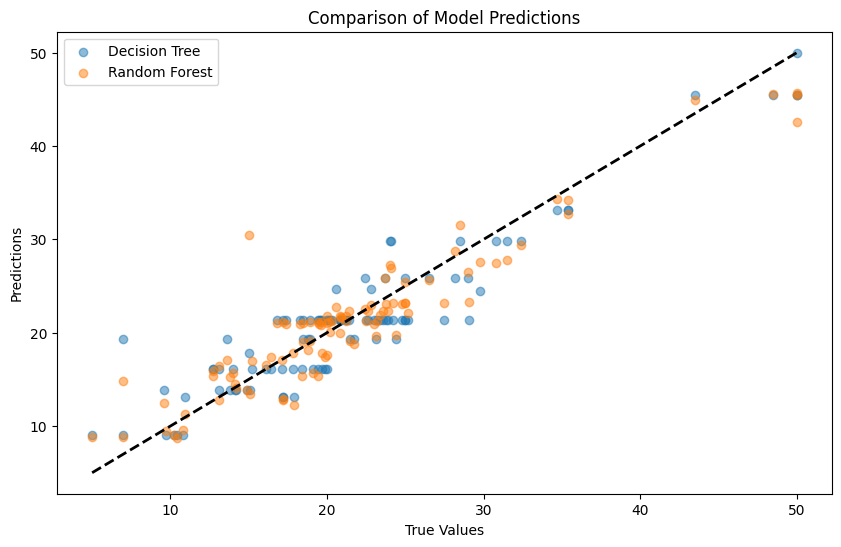

In [9]:
# Визуализация предсказаний
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.5, label='Decision Tree')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()

Почему выбраны эти метрики?
- MSE - хорошая метрика для регрессии, так как она штрафует большие ошибки сильнее, чем малые (из-за квадрата разницы). Это важно для нашей задачи, так как большие ошибки в предсказании стоимости жилья могут быть критичными.
- R² - позволяет понять, какая доля дисперсии целевой переменной объясняется моделью. Это интуитивно понятная метрика, которая показывает общее качество модели.

Выводы о качестве моделей
На основе полученных результатов можно сделать следующие выводы:

- Случайный лес показывает лучшие результаты по сравнению с деревом решений по обеим метрикам.

- Значение R² для случайного леса ближе к 1, что означает, что модель лучше объясняет вариацию данных.

- MSE для случайного леса ниже, что означает меньшую среднюю ошибку предсказаний.

- Обе модели имеют достаточно хорошее качество, но случайный лес демонстрирует лучшую обобщающую способность благодаря использованию ансамбля деревьев.